<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_6/blob/main/stt_lab6_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

In [22]:
def train_and_evaluate(train_data, test_data, batch_sizes, learning_rates, epochs):
    results = []
    for batch_size in batch_sizes:
        for lr in learning_rates:
            for epoch in epochs:
                print(f"\nTraining with batch_size={batch_size}, learning_rate={lr}, epochs={epoch}")

                search_space = {
                    'NN_TORCH': [{
                        'num_epochs': epoch,
                        'learning_rate': lr,
                        'activation': 'relu',
                        'dropout_prob': 0.1,
                        'weight_decay': 0.001,
                        'optimizer': 'adam',
                        'batch_size': batch_size,
                        'num_layers': 2,
                        'hidden_size': 16
                        # 'layers' : [16]
                    }]
                }



                predictor = TabularPredictor(
                    label='target',
                    eval_metric='accuracy',
                    path=f'models/auto_mlp_bs{batch_size}_lr{lr}_ep{epoch}',
                    problem_type='multiclass'
                )

                predictor.fit(
                    train_data,
                    hyperparameters=search_space,
                    time_limit=600,
                    verbosity=2,
                    presets=['optimize_for_deployment', 'medium_quality'],
                    raise_on_no_models_fitted=False
                )



                # Evaluate on test data
                y_true = test_data['target']
                y_pred = predictor.predict(test_data.drop(columns=['target']))
                acc = accuracy_score(y_true, y_pred)
                f1 = f1_score(y_true, y_pred, average='weighted')

                results.append({
                    'batch_size': batch_size,
                    'learning_rate': lr,
                    'epochs': epoch,
                    'accuracy': acc,
                    'f1_score': f1
                })

                print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

                # Plot confusion matrix
                cm = confusion_matrix(y_true, y_pred)
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
                plt.xlabel('Predicted Label')
                plt.ylabel('True Label')
                plt.title(f'Confusion Matrix (BS={batch_size}, LR={lr}, Epochs={epoch})')
                plt.show()

                # Display sample predictions
                sample_idx = np.random.choice(len(test_data), 5, replace=False)
                sample_inputs = test_data.iloc[sample_idx].drop(columns=['target'])
                sample_preds = predictor.predict(sample_inputs)
                sample_truth = test_data.iloc[sample_idx]['target'].values

                print("\nSample Predictions:")
                for i in range(5):
                    print(f"Input: {sample_inputs.iloc[i].values}, Prediction: {data.target_names[sample_preds.iloc[i]]}, True Label: {data.target_names[sample_truth[i]]}")

    return pd.DataFrame(results)



Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs2_lr0.001_ep1"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11073.69 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Training with batch_size=2, learning_rate=0.001, epochs=1


	0.1s = Fit runtime
	4 features in original data used to generate 4 features in processed data.
	Train Data (Processed) Memory Usage: 0.00 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.17s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 96, Val Rows: 24
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{'num_epochs': 1, 'learning_rate': 0.001, 'activation': 'relu', 'dropout_prob': 0.1, 'weight_decay': 0.001, 'optimizer': 'adam', 'batch_size': 2, 'num_layers': 2, 'hidden_size': 16}],
}
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: NeuralNetTorch ... Training model for up to 599.83s of the 599.83s of remaining time.
	0.75	 = Validation score   (accuracy)
	0.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: Weighted

Accuracy: 0.7000, F1 Score: 0.6412


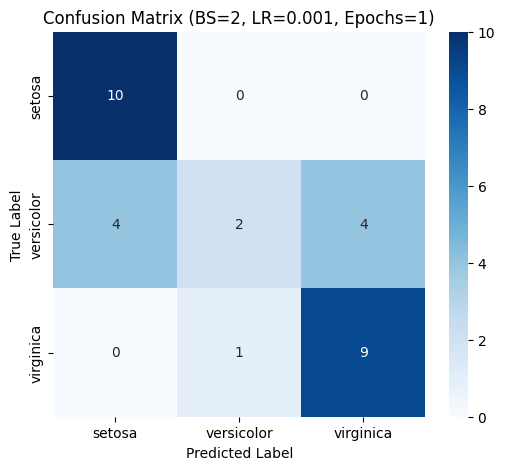

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs2_lr0.001_ep3"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11073.87 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [6.3 3.3 4.7 1.6], Prediction: virginica, True Label: versicolor
Input: [6.  3.  4.8 1.8], Prediction: virginica, True Label: virginica
Input: [6.5 3.  5.2 2. ], Prediction: virginica, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.6 2.9 4.6 1.3], Prediction: setosa, True Label: versicolor

Training with batch_size=2, learning_rate=0.001, epochs=3


	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
	Types of features in processed data (raw dtype, special dtypes):
		('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
	0.1s = Fit runtime
	4 features in original data used to generate 4 features in processed data.
	Train Data (Processed) Memory Usage: 0.00 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.17s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 96, Val Rows: 24
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{'num_epochs': 3, 'learning_rate': 0.001, 'activation': 'relu', 'dropout_prob': 0.1, 'weight_decay': 0.001, 'optimize

Accuracy: 0.7000, F1 Score: 0.6105


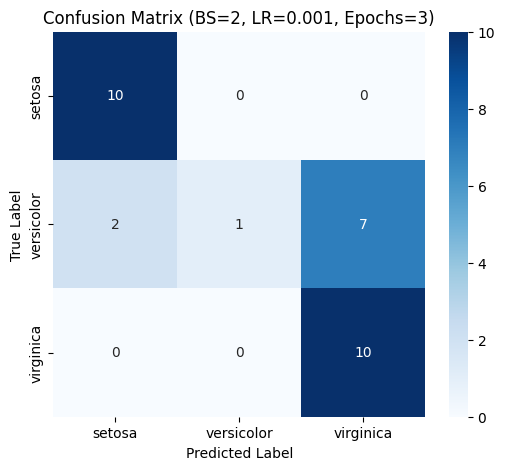

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs2_lr0.001_ep5"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11072.46 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [4.9 2.4 3.3 1. ], Prediction: setosa, True Label: versicolor
Input: [6.1 3.  4.9 1.8], Prediction: virginica, True Label: virginica
Input: [6.5 3.  5.8 2.2], Prediction: virginica, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.4 2.8 5.6 2.2], Prediction: virginica, True Label: virginica

Training with batch_size=2, learning_rate=0.001, epochs=5


	0.8333	 = Validation score   (accuracy)
	0.77s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.08s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.8333	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1.0s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3370.9 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs2_lr0.001_ep5")


Accuracy: 0.7667, F1 Score: 0.7341


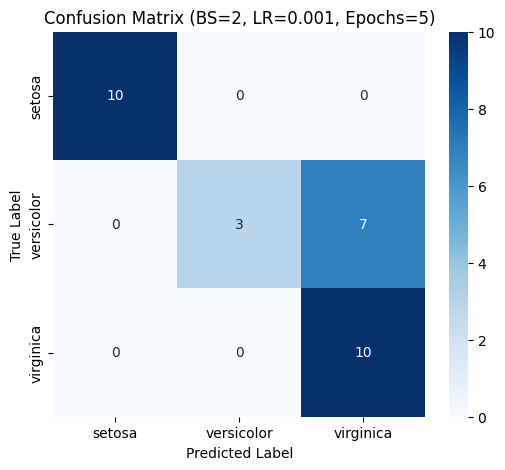

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs2_lr1e-05_ep1"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11072.05 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [5.4 3.4 1.7 0.2], Prediction: setosa, True Label: setosa
Input: [6.1 2.9 4.7 1.4], Prediction: virginica, True Label: versicolor
Input: [6.7 3.1 5.6 2.4], Prediction: virginica, True Label: virginica
Input: [5.2 3.4 1.4 0.2], Prediction: setosa, True Label: setosa
Input: [6.6 3.  4.4 1.4], Prediction: virginica, True Label: versicolor

Training with batch_size=2, learning_rate=1e-05, epochs=1


	0.4167	 = Validation score   (accuracy)
	0.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.58s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.4167	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.48s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3122.3 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs2_lr1e-05_ep1")


Accuracy: 0.4000, F1 Score: 0.3293


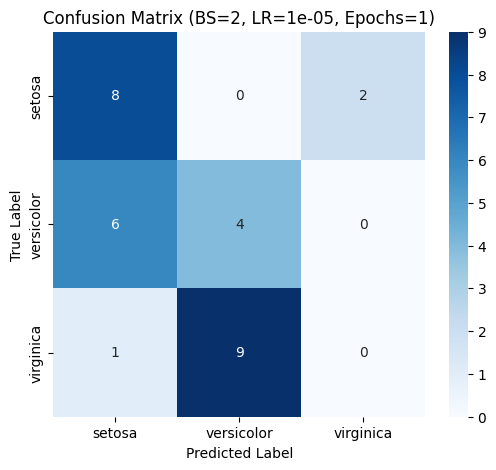

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs2_lr1e-05_ep3"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11070.94 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [6.3 3.3 4.7 1.6], Prediction: versicolor, True Label: versicolor
Input: [6.  3.  4.8 1.8], Prediction: versicolor, True Label: virginica
Input: [6.5 3.  5.2 2. ], Prediction: versicolor, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.6 2.9 4.6 1.3], Prediction: setosa, True Label: versicolor

Training with batch_size=2, learning_rate=1e-05, epochs=3


	0.4167	 = Validation score   (accuracy)
	0.51s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.41s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.4167	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.64s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 4980.6 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs2_lr1e-05_ep3")


Accuracy: 0.4000, F1 Score: 0.3293


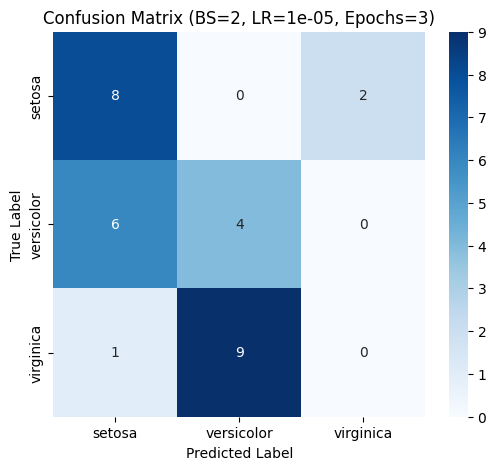

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs2_lr1e-05_ep5"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11071.46 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [4.9 2.4 3.3 1. ], Prediction: setosa, True Label: versicolor
Input: [6.1 3.  4.9 1.8], Prediction: versicolor, True Label: virginica
Input: [6.5 3.  5.8 2.2], Prediction: versicolor, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.4 2.8 5.6 2.2], Prediction: versicolor, True Label: virginica

Training with batch_size=2, learning_rate=1e-05, epochs=5


	0.4167	 = Validation score   (accuracy)
	0.51s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.42s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.4167	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.62s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 4836.8 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs2_lr1e-05_ep5")


Accuracy: 0.4333, F1 Score: 0.3467


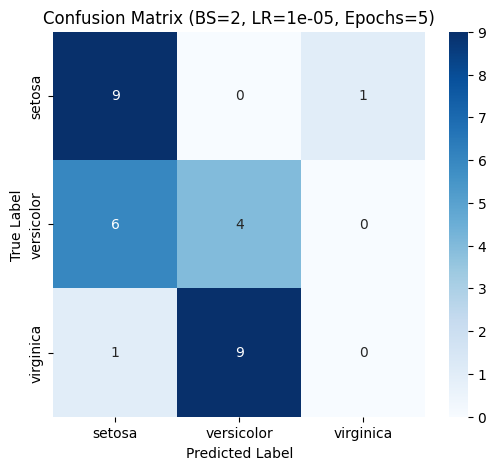

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs4_lr0.001_ep1"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11071.49 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [5.4 3.4 1.7 0.2], Prediction: setosa, True Label: setosa
Input: [6.1 2.9 4.7 1.4], Prediction: setosa, True Label: versicolor
Input: [6.7 3.1 5.6 2.4], Prediction: versicolor, True Label: virginica
Input: [5.2 3.4 1.4 0.2], Prediction: setosa, True Label: setosa
Input: [6.6 3.  4.4 1.4], Prediction: setosa, True Label: versicolor

Training with batch_size=4, learning_rate=0.001, epochs=1


	0.75	 = Validation score   (accuracy)
	0.11s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.80s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.75	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.24s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3342.0 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs4_lr0.001_ep1")


Accuracy: 0.5667, F1 Score: 0.5316


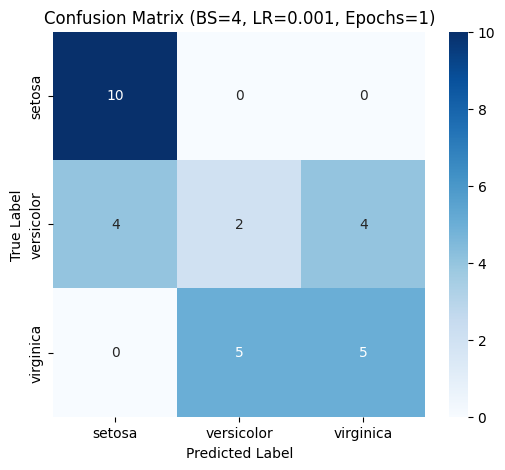

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs4_lr0.001_ep3"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11071.86 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [6.3 3.3 4.7 1.6], Prediction: virginica, True Label: versicolor
Input: [6.  3.  4.8 1.8], Prediction: versicolor, True Label: virginica
Input: [6.5 3.  5.2 2. ], Prediction: virginica, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.6 2.9 4.6 1.3], Prediction: setosa, True Label: versicolor

Training with batch_size=4, learning_rate=0.001, epochs=3


	0.7917	 = Validation score   (accuracy)
	0.29s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.63s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.7917	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.4s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2649.4 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs4_lr0.001_ep3")


Accuracy: 0.6667, F1 Score: 0.5368


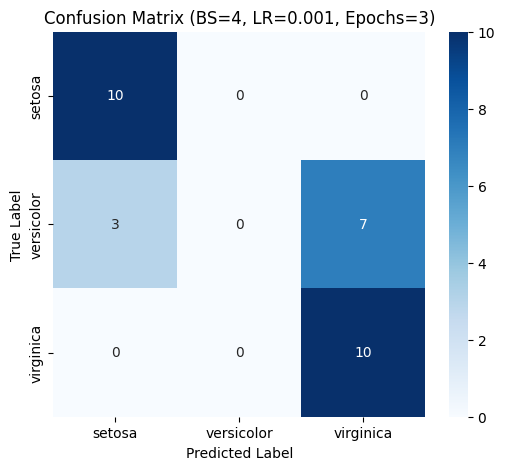

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs4_lr0.001_ep5"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11072.12 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [4.9 2.4 3.3 1. ], Prediction: setosa, True Label: versicolor
Input: [6.1 3.  4.9 1.8], Prediction: virginica, True Label: virginica
Input: [6.5 3.  5.8 2.2], Prediction: virginica, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.4 2.8 5.6 2.2], Prediction: virginica, True Label: virginica

Training with batch_size=4, learning_rate=0.001, epochs=5


	0.7917	 = Validation score   (accuracy)
	0.41s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.47s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.7917	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.58s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3667.2 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs4_lr0.001_ep5")


Accuracy: 0.7000, F1 Score: 0.6105


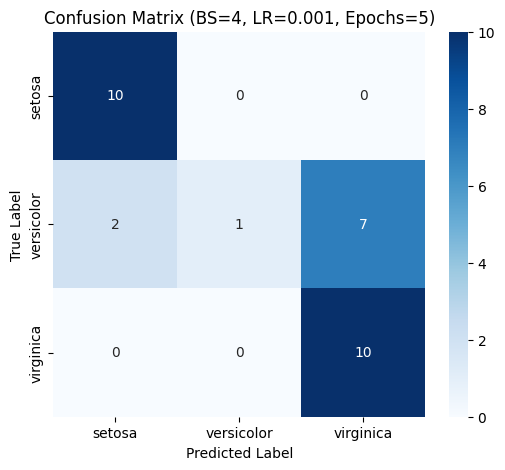

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs4_lr1e-05_ep1"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11073.04 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [5.4 3.4 1.7 0.2], Prediction: setosa, True Label: setosa
Input: [6.1 2.9 4.7 1.4], Prediction: virginica, True Label: versicolor
Input: [6.7 3.1 5.6 2.4], Prediction: virginica, True Label: virginica
Input: [5.2 3.4 1.4 0.2], Prediction: setosa, True Label: setosa
Input: [6.6 3.  4.4 1.4], Prediction: virginica, True Label: versicolor

Training with batch_size=4, learning_rate=1e-05, epochs=1


	0.4167	 = Validation score   (accuracy)
	0.16s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.75s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.4167	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.29s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2740.9 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs4_lr1e-05_ep1")


Accuracy: 0.4000, F1 Score: 0.3293


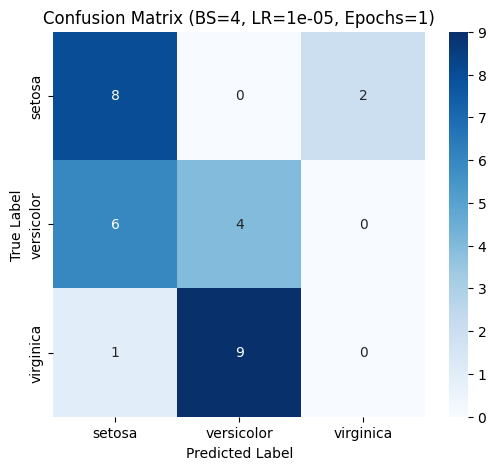

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs4_lr1e-05_ep3"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11073.43 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [6.3 3.3 4.7 1.6], Prediction: versicolor, True Label: versicolor
Input: [6.  3.  4.8 1.8], Prediction: versicolor, True Label: virginica
Input: [6.5 3.  5.2 2. ], Prediction: versicolor, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.6 2.9 4.6 1.3], Prediction: setosa, True Label: versicolor

Training with batch_size=4, learning_rate=1e-05, epochs=3


	0.4167	 = Validation score   (accuracy)
	0.3s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.59s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.4167	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.46s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1800.6 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs4_lr1e-05_ep3")


Accuracy: 0.4000, F1 Score: 0.3293


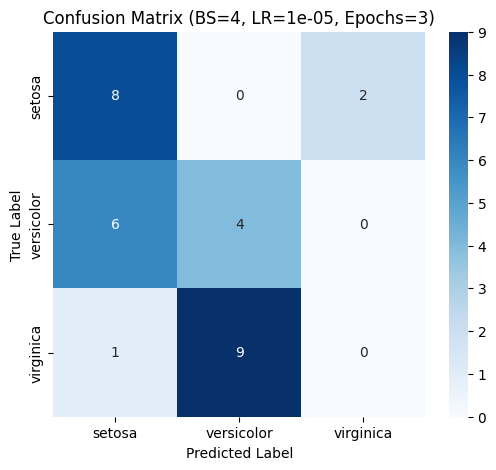

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   73.53 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_bs4_lr1e-05_ep5"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11068.98 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. 


Sample Predictions:
Input: [4.9 2.4 3.3 1. ], Prediction: setosa, True Label: versicolor
Input: [6.1 3.  4.9 1.8], Prediction: versicolor, True Label: virginica
Input: [6.5 3.  5.8 2.2], Prediction: versicolor, True Label: virginica
Input: [4.6 3.6 1.  0.2], Prediction: setosa, True Label: setosa
Input: [6.4 2.8 5.6 2.2], Prediction: versicolor, True Label: virginica

Training with batch_size=4, learning_rate=1e-05, epochs=5


	0.4167	 = Validation score   (accuracy)
	0.45s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.45s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 1.0}
	0.4167	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 0.6s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3134.2 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/auto_mlp_bs4_lr1e-05_ep5")


Accuracy: 0.4000, F1 Score: 0.3293


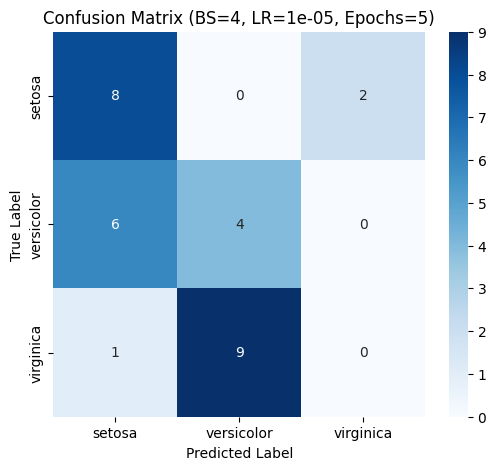


Sample Predictions:
Input: [5.4 3.4 1.7 0.2], Prediction: setosa, True Label: setosa
Input: [6.1 2.9 4.7 1.4], Prediction: setosa, True Label: versicolor
Input: [6.7 3.1 5.6 2.4], Prediction: versicolor, True Label: virginica
Input: [5.2 3.4 1.4 0.2], Prediction: setosa, True Label: setosa
Input: [6.6 3.  4.4 1.4], Prediction: setosa, True Label: versicolor

Final Results:
    batch_size  learning_rate  epochs  accuracy  f1_score
0            2        0.00100       1  0.700000  0.641211
1            2        0.00100       3  0.700000  0.610550
2            2        0.00100       5  0.766667  0.734093
3            2        0.00001       1  0.400000  0.329275
4            2        0.00001       3  0.400000  0.329275
5            2        0.00001       5  0.433333  0.346711
6            4        0.00100       1  0.566667  0.531648
7            4        0.00100       3  0.666667  0.536769
8            4        0.00100       5  0.700000  0.610550
9            4        0.00001       1  0.40

In [24]:
# Define hyperparameter values
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

# Train and evaluate
results_df = train_and_evaluate(train_data, test_data, batch_sizes, learning_rates, epochs)
print("\nFinal Results:")
print(results_df)

In [37]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd


def train_and_evaluate(train_data, test_data, method='grid', num_trials=10):
    results = []
    search_space = {
        'NN_TORCH': [{
            'num_epochs': 5,
            'learning_rate': [1e-5, 1e-3],
            'activation': 'relu',
            'dropout_prob': 0.1,
            'weight_decay': 0.001,
            'optimizer': 'adam',
            'batch_size': [2, 4],
            'num_layers': 2,
            'hidden_size': 16
        }]
    }

    predictor = TabularPredictor(
        label='target',
        eval_metric='accuracy',
        path=f'models/auto_mlp_{method}',
        problem_type='multiclass'
    )

    predictor.fit(
        train_data,
        hyperparameters=search_space,
        time_limit=600,
        verbosity=2,
        presets=['optimize_for_deployment', 'medium_quality'],
        hyperparameter_tune_kwargs={
            'num_trials': num_trials,
            'scheduler': 'hyperband' if method == 'hyperband' else 'random',
            'searcher': 'bayesopt' if method == 'bayesian' else 'random'
        } if method in ['random', 'hyperband', 'bayesian'] else None,
        raise_on_no_models_fitted=False
    )

    # Evaluate on test data
    y_true = test_data['target']
    y_pred = predictor.predict(test_data.drop(columns=['target']))
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    results.append({
        'Method': method,
        'Accuracy': acc,
        'F1 Score': f1
    })

    print(f"Method: {method} | Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    return pd.DataFrame(results)


# Run the different hyperparameter searches
methods = ['grid', 'random', 'hyperband', 'bayesian']
num_trials = 10
final_results = pd.concat([train_and_evaluate(train_data, test_data, method, num_trials) for method in methods])

print("\nFinal Comparison Table:")
print(final_results)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.74 GB / 12.67 GB (84.7%)
Disk Space Avail:   73.52 GB / 107.72 GB (68.3%)
Presets specified: ['optimize_for_deployment', 'medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/auto_mlp_grid"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10996.21 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature

AssertionError: Trainer has no fit models that can infer.